#### Pair Problem

**Practice LASSO regularization technique in five steps**:

1. Load the diabetes dataset from sklearn (sklearn.datasets.load_diabetes()). Note that the data is already scaled. Or, try and make your own randomly generated data!
  
2. Use the KFold function from sklearn's cross validation module to divide the data into 5 training/test sets. Randomize the KFolds (via the shuffle parameter with a random state you seed).
  
3. Tune the lambda (or per sklearn, alpha) parameter in the LASSO model by looping over a grid of possible lambdas.

        * For each candidate lambda, loop over the 5 training/test sets.
        * On each training/test set run the LASSO model on the training set and then compute and record the prediction errors on the train/test sets.
        * Finally, total the prediction error for the 5 training/test sets.
         
4. Set lambda to be the value that minimizes prediction error. Run the LASSO model again with the optimal lambda determined in step 3. Which variables would you consider excluding on the basis of these results?  

5. What next steps would you take from here? Extra credit: try feature engineering, other models, plotting, etc. Compare your results.

In [32]:
# Today's pair is to do LASSO Cross Validation Regularization in the manual way

Create Kfold cross-validator object

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
Lambda = np.arange(0.001,1.0,0.001) # a list of lambdas
Prediction_error = [] # an empty list to hold the prediction error

In [ ]:
for l in Lambda: # loop over lambdas
    pe = 0.0 # initiliaze prediction error
    for train_index, test_index in kf.split(X_train,y_train): # will give you 5 sets of indexes because n_splits =5
        model = Lasso(l) # create model object
        results = model.fit(X[train_index], y[train_index]) # Fit the model in each loop
        be += np.mean(model.predict(X[test_index]) - y[test_index]**2)
    Prediction_error.append(pe/5) # Divide by 5 to get the mean, because your n_splits=5

print("Error for the first 5 lambdas", Prediction_error[0:5])

# We choose the lambda that gave us the lowest error in the CV process. That is our best model

In [ ]:
# choose the best lambda that gives the lwoest error
best_lambda = Lambda[Prediction_error.index(min(Prediction_error))]
print("Best Lambda:", best_lambda)
model = Lasso(best_lambda)

# Own Attempt

In [31]:
import pandas as pd
import numpy as np

from sklearn import datasets  # To load dataset
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # StandardScaler = scales the data

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
diabetes = sklearn.datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
df['target'] = pd.Series(diabetes.target)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


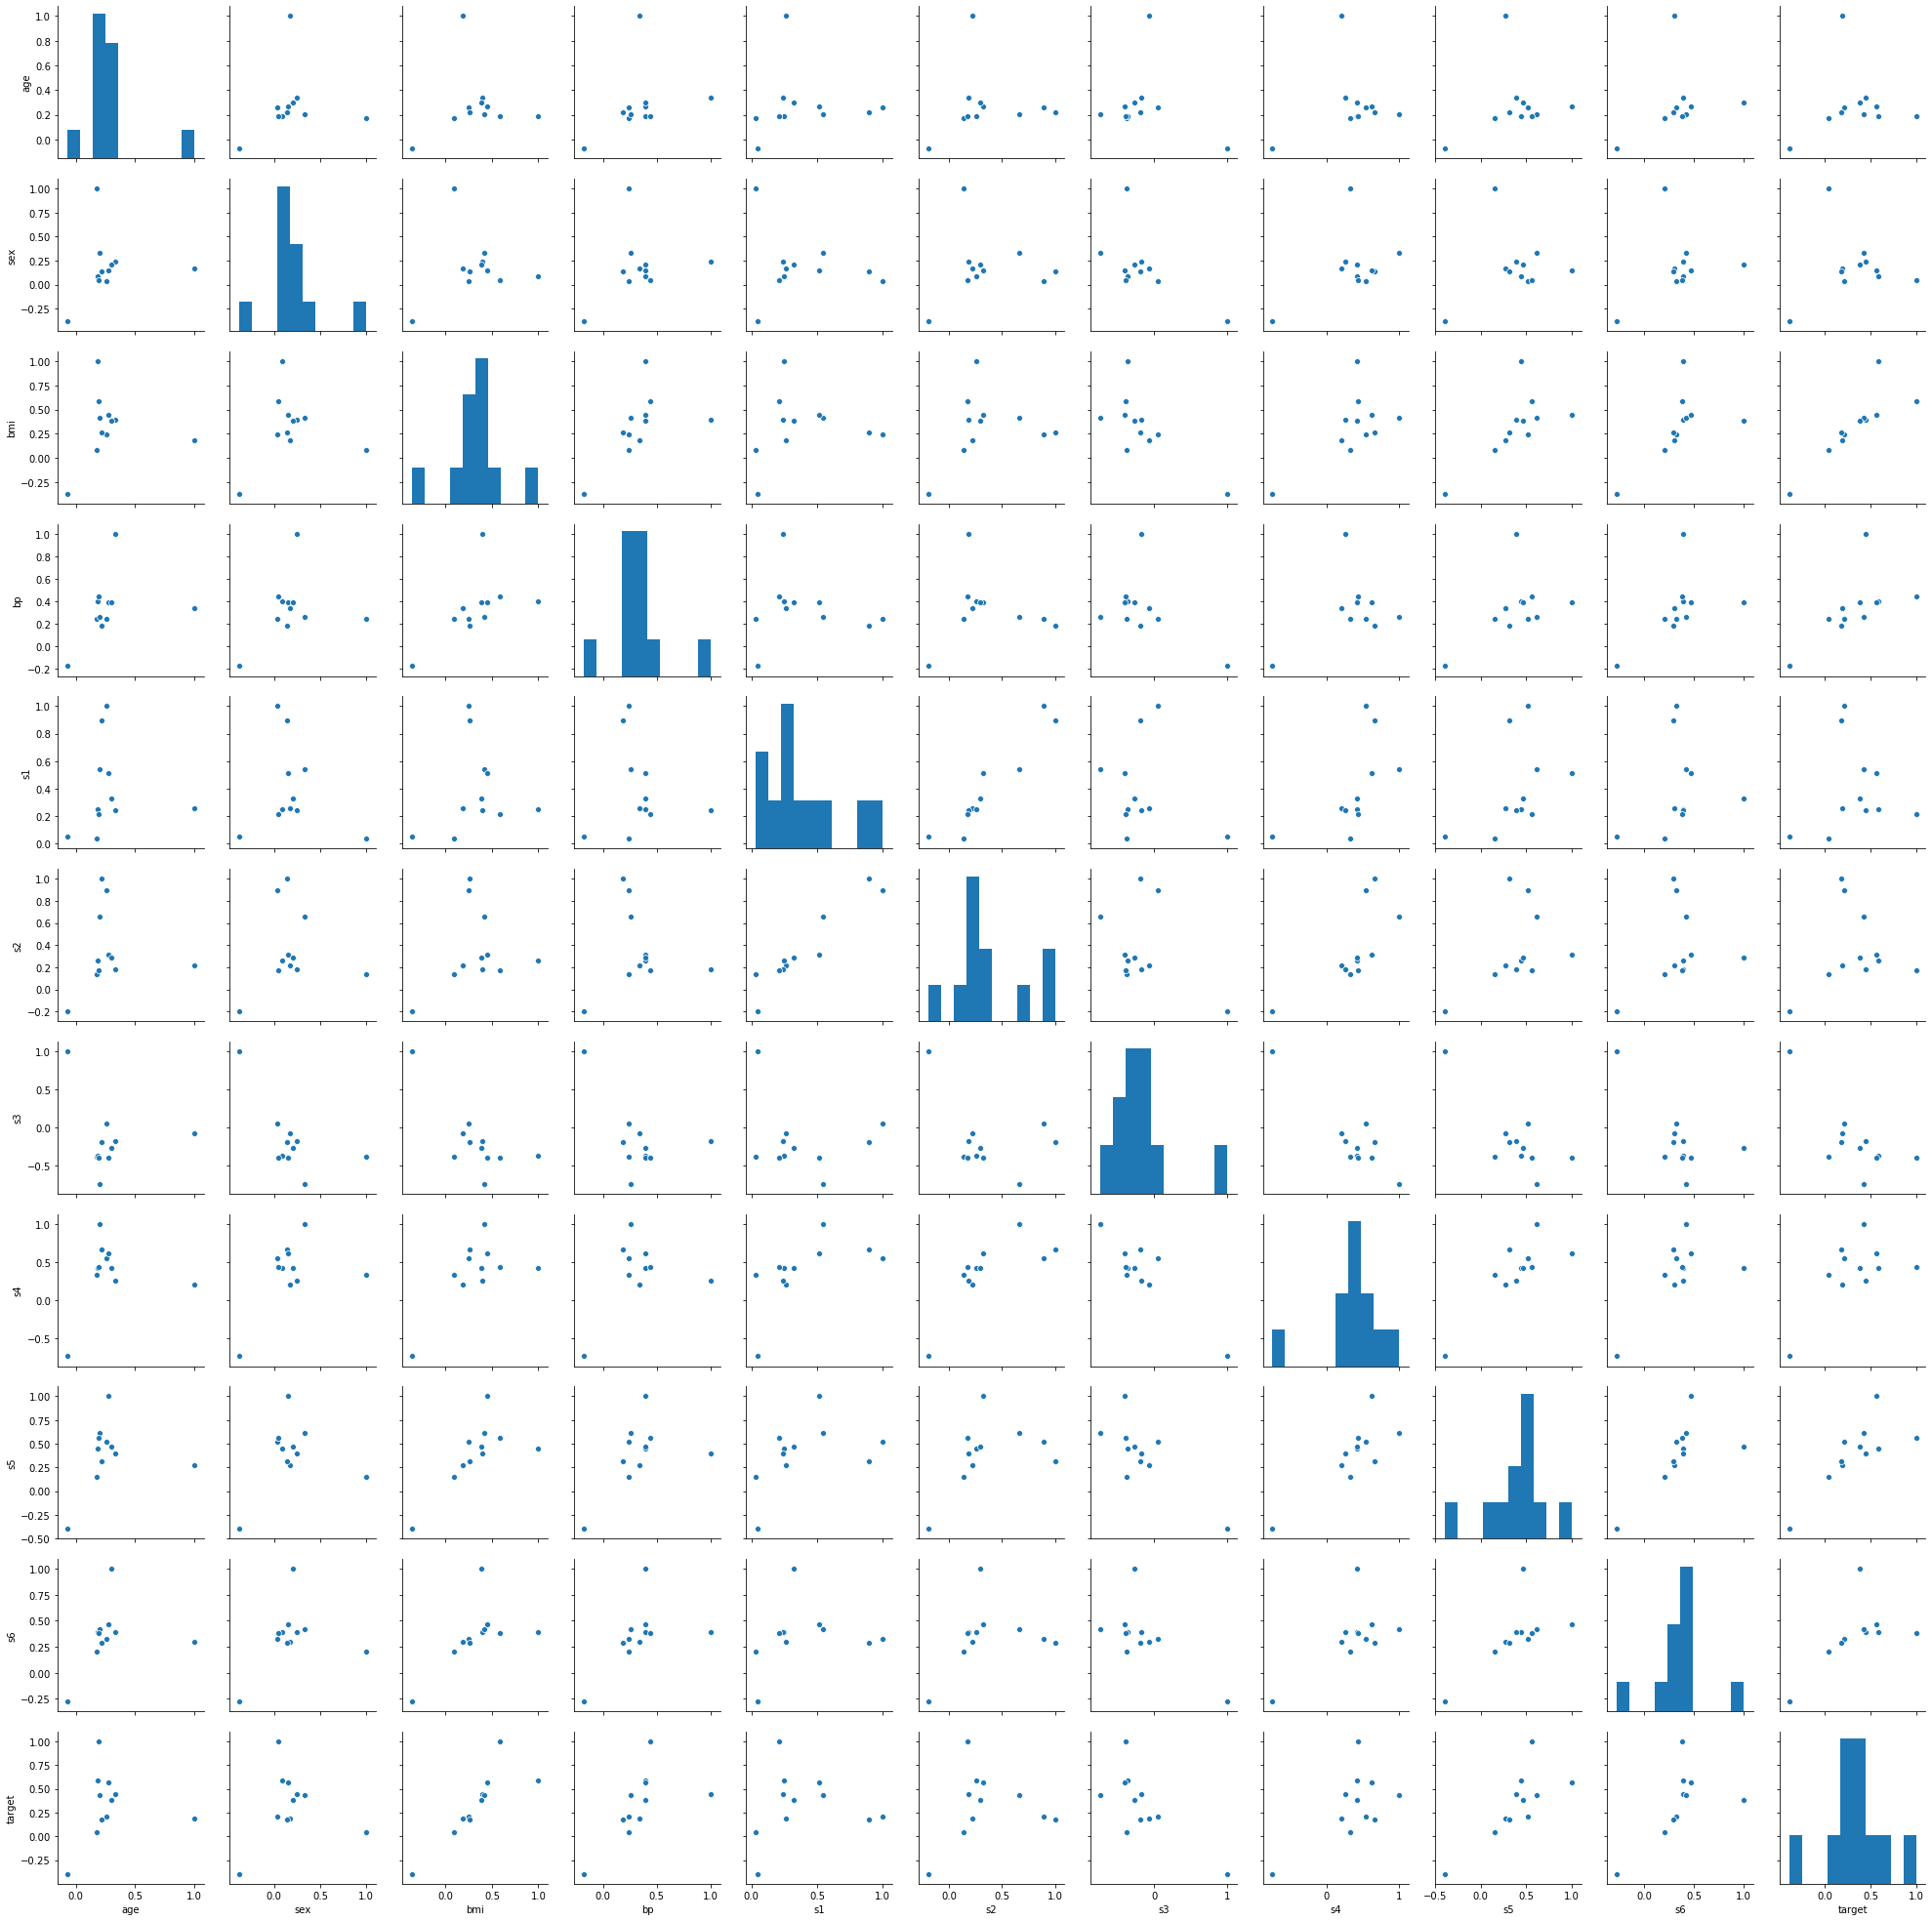

In [21]:
sns.pairplot(df.corr())

In [25]:
df.corr()['target'].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

## Rigorous Validation Method: Cross-Validation / Test

In [27]:
# Define Independent Variables and Dependent Variables
X, y = df.drop('target',axis=1), df['target']

In [28]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) # hold out 20% of the data for final testing

X, y = np.array(X), np.array(y) # this helps with the way kf will generate indices below

In [29]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71) 
cv_lm_lasso_mse = 0  
mean_cv_lm_lasso_mse = []

for alpha_value in np.arange(1,5,0.1): 
    cv_lm_lasso_mse = 0
    for train_kf_split, val_kf_split in kf.split(X,y):
        X_train, y_train = X[train_kf_split], y[train_kf_split]
        X_val, y_val = X
        lm_lasso = Lasso(alpha=alpha_value)
        fit = lm_lasso.fit(X_train,y_train)

In [ ]:
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

In [30]:
for train_ind, val_ind in kf.split(X,y): # len(kf.split(X.y)) should be 5 since you set n_split=5
    # looping through each subset of kfold and running the whole training code
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.5046458422582438, 0.39146685727657726, 0.40158483229294883, 0.5490289048225514, 0.43414015750691853]
Ridge scores:  [0.5057826196567856, 0.39261881508494734, 0.39955177157011934, 0.5522360927668519, 0.4326108118402788] 

Simple mean cv r^2: 0.456 +- 0.061
Ridge mean cv r^2: 0.457 +- 0.062
